In [1]:
#import library
import numpy as np
import pandas as pd
import mysql.connector as mysql

In [2]:
host="localhost"
user="root"
passwd=""
db= "fuzzy_tahani"

conn= mysql.connect(host=host, user=user, password= passwd, database=db)

if conn.is_connected():
  print("Berhasil terhubung ke database")

Berhasil terhubung ke database


In [3]:
cursor = conn.cursor()
sql = "SELECT * FROM karyawan"
cursor.execute(sql)

results = cursor.fetchall()

for data in results:
  print(data)

('ID01', 'LIA', 30, 6, 750)
('ID02', 'IWAN', 48, 17, 1255)
('ID03', 'SARI', 36, 14, 1500)
('ID04', 'ANDI', 37, 4, 1040)
('ID05', 'BUDI', 42, 12, 950)
('ID06', 'AMIR', 39, 13, 1600)
('ID07', 'RIAN', 37, 5, 1250)
('ID08', 'KIKI', 32, 1, 550)
('ID09', 'ALDA', 35, 3, 735)
('ID10', 'YOGA', 25, 2, 860)


In [4]:
data_karyawan = pd.read_sql_query(sql,con=conn)
data_karyawan

,NIP,NAMA,UMUR,MASA_KERJA,GAJI
0,ID01,LIA,30,6,750
1,ID02,IWAN,48,17,1255
2,ID03,SARI,36,14,1500
3,ID04,ANDI,37,4,1040
4,ID05,BUDI,42,12,950
5,ID06,AMIR,39,13,1600
6,ID07,RIAN,37,5,1250
7,ID08,KIKI,32,1,550
8,ID09,ALDA,35,3,735
9,ID10,YOGA,25,2,860


In [5]:
data_umur = np.array(data_karyawan)
data_umur = data_umur[:,[0,2]]
print("index = 0 Id karyawan, 1 = Umur")
pd.DataFrame(data_umur)

index = 0 Id karyawan, 1 = Umur


,0,1
0,ID01,30
1,ID02,48
2,ID03,36
3,ID04,37
4,ID05,42
5,ID06,39
6,ID07,37
7,ID08,32
8,ID09,35
9,ID10,25


In [6]:
data_masa_kerja = np.array(data_karyawan)
data_masa_kerja = data_masa_kerja[:,[0,3]]
print("index = 0 Id karyawan, 1 = Masa Kerja")
pd.DataFrame(data_masa_kerja)

index = 0 Id karyawan, 1 = Masa Kerja


,0,1
0,ID01,6
1,ID02,17
2,ID03,14
3,ID04,4
4,ID05,12
5,ID06,13
6,ID07,5
7,ID08,1
8,ID09,3
9,ID10,2


In [7]:
#data gaji
data_gaji = np.array(data_karyawan)
data_gaji = data_gaji[:,[0,4]]
print("index = 0 Id karyawan, 1 = Gaji")
pd.DataFrame(data_gaji)

index = 0 Id karyawan, 1 = Gaji


,0,1
0,ID01,750
1,ID02,1255
2,ID03,1500
3,ID04,1040
4,ID05,950
5,ID06,1600
6,ID07,1250
7,ID08,550
8,ID09,735
9,ID10,860


In [8]:
umur_01 = np.sum(data_umur[0:1,1], axis=0)
umur_02 = np.sum(data_umur[1:2,1], axis=0)
umur_03 = np.sum(data_umur[2:3,1], axis=0)
umur_04 = np.sum(data_umur[3:4,1], axis=0)
umur_05 = np.sum(data_umur[4:5,1], axis=0)
umur_06 = np.sum(data_umur[5:6,1], axis=0)
umur_07 = np.sum(data_umur[6:7,1], axis=0)
umur_08 = np.sum(data_umur[7:8,1], axis=0)
umur_09 = np.sum(data_umur[8:9,1], axis=0)
umur_10 = np.sum(data_umur[9:10,1], axis=0)

In [9]:
masa_kerja_01 =np.sum(data_masa_kerja[0:1,1], axis=0)
masa_kerja_02 =np.sum(data_masa_kerja[1:2,1], axis=0)
masa_kerja_03 =np.sum(data_masa_kerja[2:3,1], axis=0)
masa_kerja_04 =np.sum(data_masa_kerja[3:4,1], axis=0)
masa_kerja_05 =np.sum(data_masa_kerja[4:5,1], axis=0)
masa_kerja_06 =np.sum(data_masa_kerja[5:6,1], axis=0)
masa_kerja_07 =np.sum(data_masa_kerja[6:7,1], axis=0)
masa_kerja_08 =np.sum(data_masa_kerja[7:8,1], axis=0)
masa_kerja_09 =np.sum(data_masa_kerja[8:9,1], axis=0)
masa_kerja_10 =np.sum(data_masa_kerja[9:10,1], axis=0)

In [10]:
gaji_01 = np.sum(data_gaji[0:1,1], axis=0)
gaji_02 = np.sum(data_gaji[1:2,1], axis=0)
gaji_03 = np.sum(data_gaji[2:3,1], axis=0)
gaji_04 = np.sum(data_gaji[3:4,1], axis=0)
gaji_05 = np.sum(data_gaji[4:5,1], axis=0)
gaji_06 = np.sum(data_gaji[5:6,1], axis=0)
gaji_07 = np.sum(data_gaji[6:7,1], axis=0)
gaji_08 = np.sum(data_gaji[7:8,1], axis=0)
gaji_09 = np.sum(data_gaji[8:9,1], axis=0)
gaji_10 = np.sum(data_gaji[9:10,1], axis=0)

#MODEL FUZZY TAHANI 

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [12]:
def RangeSubjektif(_low, _high, _step):
    subjektif = np.arange(_low, _high, _step)
    return subjektif

def AlgoritmaFuzzy(_rules, _range_subjektif, _title):
    lo = fuzz.trapmf(_range_subjektif,_rules[0] )
    mi = fuzz.trapmf(_range_subjektif,_rules[1] )
    hi = fuzz.trapmf(_range_subjektif,_rules[2] )
    
    fig, ax = plt.subplots(nrows=1, figsize=(6, 3))
    ax.plot(_range_subjektif, lo, 'b', linewidth=1.5, label='Muda')
    ax.plot(_range_subjektif, mi, 'g', linewidth=1.5, label='Parobaya')
    ax.plot(_range_subjektif, hi, 'r', linewidth=1.5, label='Tua')
    
    ax.set_title(_title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()
    
    return lo,mi,hi

def AlgoritmaFuzzy2(_rules, _range_subjektif, _title):
    mi = fuzz.trapmf(_range_subjektif,_rules[0] )
    hi = fuzz.trapmf(_range_subjektif,_rules[1] )
    
    fig, ax = plt.subplots(nrows=1, figsize=(6, 3))
    ax.plot(_range_subjektif, mi, 'g', linewidth=1.5, label='Baru')
    ax.plot(_range_subjektif, hi, 'r', linewidth=1.5, label='Lama')
    
    ax.set_title(_title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()
    
    return mi,hi

def AlgoritmaFuzzy3(_rules, _range_subjektif, _title):
    lo = fuzz.trapmf(_range_subjektif,_rules[0] )
    mi = fuzz.trapmf(_range_subjektif,_rules[1] )
    hi = fuzz.trapmf(_range_subjektif,_rules[2] )
    
    fig, ax = plt.subplots(nrows=1, figsize=(6, 3))
    ax.plot(_range_subjektif, lo, 'b', linewidth=1.5, label='Rendah')
    ax.plot(_range_subjektif, mi, 'g', linewidth=1.5, label='Sedang')
    ax.plot(_range_subjektif, hi, 'r', linewidth=1.5, label='Tinggi')
    
    ax.set_title(_title)
    ax.legend()
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()
    
    return lo,mi,hi

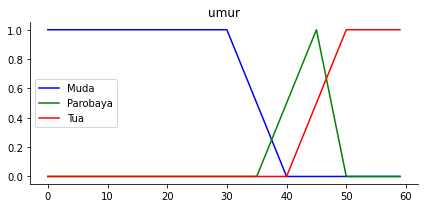

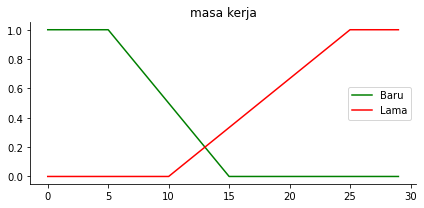

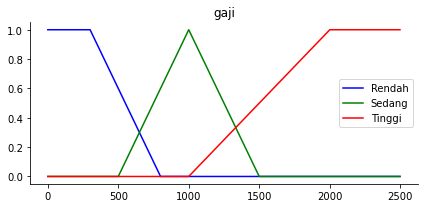

In [13]:
xumur = RangeSubjektif(0, 60, 1)
rumur = np.array([
    [0, 0, 30, 40],
    [35, 45, 45, 50],
    [40,50, 60, 60]
])

xmasa_kerja = RangeSubjektif(0, 30, 1)
rmasa_kerja = np.array([
    [0, 0, 5, 15],
    [10, 25, 30,30]
])

xgaji = RangeSubjektif(0, 2500, 1)
rgaji = np.array([
    [0,0, 300, 800],
    [500, 1000, 1000,1500],
    [1000, 2000, 2500, 2500]
])

#menampilkan grafik
lo_umur, mi_umur, hi_umur = AlgoritmaFuzzy(rumur, xumur, 'umur')
mi_masa_kerja, hi_masa_kerja = AlgoritmaFuzzy2(rmasa_kerja, xmasa_kerja, 'masa kerja')
lo_gaji, mi_gaji, hi_gaji = AlgoritmaFuzzy3(rgaji, xgaji, 'gaji')

In [14]:
def FungsiKeanggotaan(_range, _lo, _mi, _hi, _nilai):
    lo = fuzz.interp_membership(_range, _lo, _nilai)
    mi = fuzz.interp_membership(_range, _mi, _nilai)
    hi = fuzz.interp_membership(_range, _hi, _nilai)
    return lo, mi, hi

def FungsiKeanggotaan2(_range,  _mi, _hi, _nilai):
    mi = fuzz.interp_membership(_range, _mi, _nilai)
    hi = fuzz.interp_membership(_range, _hi, _nilai)
    return mi, hi



In [15]:
def Status(_keanggotaan):
    status = ""
    if _keanggotaan[0] > _keanggotaan[1] and _keanggotaan[0] > _keanggotaan[2]:
        status = "low"
    elif _keanggotaan[1] > _keanggotaan[0] and _keanggotaan[1] > _keanggotaan[2]:
        status = "medium"
    elif _keanggotaan[2] > _keanggotaan[0] and _keanggotaan[2] > _keanggotaan[1]:
        status = "high"
    
    return status

def Status2(_keanggotaan):
    status = ""
    if _keanggotaan[0] > _keanggotaan[1] :
        status = "low"
    elif _keanggotaan[1] > _keanggotaan[0] :
        status = "medium"
    
    return status

In [16]:
def RuleBase(_status_umur, _status_masa_kerja, _status_gaji):
    umur = _status_umur
    masa_kerja = _status_masa_kerja
    gaji = _status_gaji
    
    karyawan = ""
    
    if umur == "high" and masa_kerja == "medium" and gaji == "high":
        karyawan = "karyawan tetap"
    elif umur == "low" and masa_kerja == "low" and gaji == "medium":
        karyawan = "karyawan kontrak"
    else:
        karyawan = "Tidak Diketahui"
    
    return karyawan

In [17]:
umur_ang_01 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_01)
umur_ang_02 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_02)
umur_ang_03 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_03)
umur_ang_04 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_04)
umur_ang_05 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_05)
umur_ang_06 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_06)
umur_ang_07 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_07)
umur_ang_08 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_08)
umur_ang_09 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_09)
umur_ang_10 = FungsiKeanggotaan(xumur, lo_umur, mi_umur, hi_umur, umur_10)

print("umur_angg_01 :", umur_ang_01 )
print("umur_angg_02 :", umur_ang_02 )
print("umur_angg_03 :", umur_ang_03 )
print("umur_angg_04 :", umur_ang_04 )
print("umur_angg_05 :", umur_ang_05 )
print("umur_angg_06 :", umur_ang_06 )
print("umur_angg_07 :", umur_ang_07 )
print("umur_angg_08 :", umur_ang_08 )
print("umur_angg_09 :", umur_ang_09 )
print("umur_angg_10 :", umur_ang_10 )

umur_sts_01 = Status(umur_ang_01)
umur_sts_02 = Status(umur_ang_02)
umur_sts_03 = Status(umur_ang_03)
umur_sts_04 = Status(umur_ang_04)
umur_sts_05 = Status(umur_ang_05)
umur_sts_06 = Status(umur_ang_06)
umur_sts_07 = Status(umur_ang_07)
umur_sts_08 = Status(umur_ang_08)
umur_sts_09 = Status(umur_ang_09)
umur_sts_10 = Status(umur_ang_10)

print("umur_sts_01 :",umur_sts_01)
print("umur_sts_02 :",umur_sts_02)
print("umur_sts_03 :",umur_sts_03)
print("umur_sts_04 :",umur_sts_04)
print("umur_sts_05 :",umur_sts_05)
print("umur_sts_06 :",umur_sts_06)
print("umur_sts_07 :",umur_sts_07)
print("umur_sts_08 :",umur_sts_08)
print("umur_sts_09 :",umur_sts_09)
print("umur_sts_10 :",umur_sts_10)

umur_angg_01 : (1.0, 0.0, 0.0)
umur_angg_02 : (0.0, 0.4, 0.8)
umur_angg_03 : (0.4, 0.1, 0.0)
umur_angg_04 : (0.3, 0.2, 0.0)
umur_angg_05 : (0.0, 0.7, 0.2)
umur_angg_06 : (0.1, 0.4, 0.0)
umur_angg_07 : (0.3, 0.2, 0.0)
umur_angg_08 : (0.8, 0.0, 0.0)
umur_angg_09 : (0.5, 0.0, 0.0)
umur_angg_10 : (1.0, 0.0, 0.0)
umur_sts_01 : low
umur_sts_02 : high
umur_sts_03 : low
umur_sts_04 : low
umur_sts_05 : medium
umur_sts_06 : medium
umur_sts_07 : low
umur_sts_08 : low
umur_sts_09 : low
umur_sts_10 : low


In [18]:
masa_kerja_ang_01 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_01)
masa_kerja_ang_02 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_02)
masa_kerja_ang_03 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_03)
masa_kerja_ang_04 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_04)
masa_kerja_ang_05 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_05)
masa_kerja_ang_06 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_06)
masa_kerja_ang_07 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_07)
masa_kerja_ang_08 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_08)
masa_kerja_ang_09 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_09)
masa_kerja_ang_10 = FungsiKeanggotaan2(xmasa_kerja, mi_masa_kerja, hi_masa_kerja, masa_kerja_10)

print("masa_kerja_ang_01 :", masa_kerja_ang_01 )
print("masa_kerja_ang_02 :", masa_kerja_ang_02 )
print("masa_kerja_ang_03 :", masa_kerja_ang_03 )
print("masa_kerja_ang_04 :", masa_kerja_ang_04 )
print("masa_kerja_ang_05 :", masa_kerja_ang_05 )
print("masa_kerja_ang_06 :", masa_kerja_ang_06 )
print("masa_kerja_ang_07 :", masa_kerja_ang_07 )
print("masa_kerja_ang_08 :", masa_kerja_ang_08 )
print("masa_kerja_ang_09 :", masa_kerja_ang_09 )
print("masa_kerja_ang_10 :", masa_kerja_ang_10 )

masa_kerja_sts_01 = Status2(masa_kerja_ang_01)
masa_kerja_sts_02 = Status2(masa_kerja_ang_02)
masa_kerja_sts_03 = Status2(masa_kerja_ang_03)
masa_kerja_sts_04 = Status2(masa_kerja_ang_04)
masa_kerja_sts_05 = Status2(masa_kerja_ang_05)
masa_kerja_sts_06 = Status2(masa_kerja_ang_06)
masa_kerja_sts_07 = Status2(masa_kerja_ang_07)
masa_kerja_sts_08 = Status2(masa_kerja_ang_08)
masa_kerja_sts_09 = Status2(masa_kerja_ang_09)
masa_kerja_sts_10 = Status2(masa_kerja_ang_10)

print("masa_kerja_sts_01 :",masa_kerja_sts_01)
print("masa_kerja_sts_02 :",masa_kerja_sts_02)
print("masa_kerja_sts_03 :",masa_kerja_sts_03)
print("masa_kerja_sts_04 :",masa_kerja_sts_04)
print("masa_kerja_sts_05 :",masa_kerja_sts_05)
print("masa_kerja_sts_06 :",masa_kerja_sts_06)
print("masa_kerja_sts_07 :",masa_kerja_sts_07)
print("masa_kerja_sts_08 :",masa_kerja_sts_08)
print("masa_kerja_sts_09 :",masa_kerja_sts_09)
print("masa_kerja_sts_10 :",masa_kerja_sts_10)

masa_kerja_ang_01 : (0.9, 0.0)
masa_kerja_ang_02 : (0.0, 0.4666666666666667)
masa_kerja_ang_03 : (0.1, 0.26666666666666666)
masa_kerja_ang_04 : (1.0, 0.0)
masa_kerja_ang_05 : (0.3, 0.13333333333333333)
masa_kerja_ang_06 : (0.2, 0.2)
masa_kerja_ang_07 : (1.0, 0.0)
masa_kerja_ang_08 : (1.0, 0.0)
masa_kerja_ang_09 : (1.0, 0.0)
masa_kerja_ang_10 : (1.0, 0.0)
masa_kerja_sts_01 : low
masa_kerja_sts_02 : medium
masa_kerja_sts_03 : medium
masa_kerja_sts_04 : low
masa_kerja_sts_05 : low
masa_kerja_sts_06 : 
masa_kerja_sts_07 : low
masa_kerja_sts_08 : low
masa_kerja_sts_09 : low
masa_kerja_sts_10 : low


In [19]:
gaji_ang_01 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_01)
gaji_ang_02 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_02)
gaji_ang_03 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_03)
gaji_ang_04 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_04)
gaji_ang_05 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_05)
gaji_ang_06 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_06)
gaji_ang_07 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_07)
gaji_ang_08 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_08)
gaji_ang_09 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_09)
gaji_ang_10 = FungsiKeanggotaan(xgaji, lo_gaji, mi_gaji, hi_gaji, gaji_10)

print("gaji_ang_01 :", gaji_ang_01 )
print("gaji_ang_02 :", gaji_ang_02 )
print("gaji_ang_03 :", gaji_ang_03 )
print("gaji_ang_04 :", gaji_ang_04 )
print("gaji_ang_05 :", gaji_ang_05 )
print("gaji_ang_06 :", gaji_ang_06 )
print("gaji_ang_07 :", gaji_ang_07 )
print("gaji_ang_08 :", gaji_ang_08 )
print("gaji_ang_09 :", gaji_ang_09 )
print("gaji_ang_10 :", gaji_ang_10 )

gaji_sts_01 = Status(gaji_ang_01)
gaji_sts_02 = Status(gaji_ang_02)
gaji_sts_03 = Status(gaji_ang_03)
gaji_sts_04 = Status(gaji_ang_04)
gaji_sts_05 = Status(gaji_ang_05)
gaji_sts_06 = Status(gaji_ang_06)
gaji_sts_07 = Status(gaji_ang_07)
gaji_sts_08 = Status(gaji_ang_08)
gaji_sts_09 = Status(gaji_ang_09)
gaji_sts_10 = Status(gaji_ang_10)

print("gaji_sts_01 :",gaji_sts_01)
print("gaji_sts_02 :",gaji_sts_02)
print("gaji_sts_03 :",gaji_sts_03)
print("gaji_sts_04 :",gaji_sts_04)
print("gaji_sts_05 :",gaji_sts_05)
print("gaji_sts_06 :",gaji_sts_06)
print("gaji_sts_07 :",gaji_sts_07)
print("gaji_sts_08 :",gaji_sts_08)
print("gaji_sts_09 :",gaji_sts_09)
print("gaji_sts_10 :",gaji_sts_10)


gaji_ang_01 : (0.1, 0.5, 0.0)
gaji_ang_02 : (0.0, 0.49, 0.255)
gaji_ang_03 : (0.0, 0.0, 0.5)
gaji_ang_04 : (0.0, 0.92, 0.04)
gaji_ang_05 : (0.0, 0.9, 0.0)
gaji_ang_06 : (0.0, 0.0, 0.6)
gaji_ang_07 : (0.0, 0.5, 0.25)
gaji_ang_08 : (0.5, 0.1, 0.0)
gaji_ang_09 : (0.13, 0.47, 0.0)
gaji_ang_10 : (0.0, 0.72, 0.0)
gaji_sts_01 : medium
gaji_sts_02 : medium
gaji_sts_03 : high
gaji_sts_04 : medium
gaji_sts_05 : medium
gaji_sts_06 : high
gaji_sts_07 : medium
gaji_sts_08 : low
gaji_sts_09 : medium
gaji_sts_10 : medium


In [20]:
#rule based
status_karyawan_01 = RuleBase(umur_sts_01, masa_kerja_sts_01,gaji_sts_01 )
status_karyawan_02 = RuleBase(umur_sts_02, masa_kerja_sts_02,gaji_sts_02 )
status_karyawan_03 = RuleBase(umur_sts_03, masa_kerja_sts_03,gaji_sts_03 )
status_karyawan_04 = RuleBase(umur_sts_04, masa_kerja_sts_04,gaji_sts_04 )
status_karyawan_05 = RuleBase(umur_sts_05, masa_kerja_sts_05,gaji_sts_05 )
status_karyawan_06 = RuleBase(umur_sts_06, masa_kerja_sts_06,gaji_sts_06 )
status_karyawan_07 = RuleBase(umur_sts_07, masa_kerja_sts_07,gaji_sts_07 )
status_karyawan_08 = RuleBase(umur_sts_08, masa_kerja_sts_08,gaji_sts_08 )
status_karyawan_09 = RuleBase(umur_sts_09, masa_kerja_sts_09,gaji_sts_09 )
status_karyawan_10 = RuleBase(umur_sts_10, masa_kerja_sts_10,gaji_sts_10 )

print("status_karyawan_01 :", status_karyawan_01 )
print("status_karyawan_02 :", status_karyawan_02 )
print("status_karyawan_03 :", status_karyawan_03 )
print("status_karyawan_04 :", status_karyawan_04 )
print("status_karyawan_05 :", status_karyawan_05 )
print("status_karyawan_06 :", status_karyawan_06 )
print("status_karyawan_07 :", status_karyawan_07 )
print("status_karyawan_08 :", status_karyawan_08 )
print("status_karyawan_09 :", status_karyawan_09 )
print("status_karyawan_10 :", status_karyawan_10 )

status_karyawan_01 : karyawan kontrak
status_karyawan_02 : Tidak Diketahui
status_karyawan_03 : Tidak Diketahui
status_karyawan_04 : karyawan kontrak
status_karyawan_05 : Tidak Diketahui
status_karyawan_06 : Tidak Diketahui
status_karyawan_07 : karyawan kontrak
status_karyawan_08 : Tidak Diketahui
status_karyawan_09 : karyawan kontrak
status_karyawan_10 : karyawan kontrak


# soal
siapa saja karyawan yang masih muda tapi memiliki gaji tinggi
select namafrom karyawan whre umur=muda and gaji=tinggi

In [23]:
def RuleBase2(_status_umur, _status_masa_kerja, _status_gaji):
    umur = _status_umur
    masa_kerja = _status_masa_kerja
    gaji = _status_gaji
    
    karyawan = ""
    
    if umur == "low" and gaji == "":
        karyawan = "karyawan tetap"
    else:
        karyawan = "Tidak Diketahui"
    
    return karyawan

In [24]:
status_karyawan_01 = RuleBase2(umur_sts_01, masa_kerja_sts_01,gaji_sts_01 )
status_karyawan_02 = RuleBase2(umur_sts_02, masa_kerja_sts_02,gaji_sts_02 )
status_karyawan_03 = RuleBase2(umur_sts_03, masa_kerja_sts_03,gaji_sts_03 )
status_karyawan_04 = RuleBase2(umur_sts_04, masa_kerja_sts_04,gaji_sts_04 )
status_karyawan_05 = RuleBase2(umur_sts_05, masa_kerja_sts_05,gaji_sts_05 )
status_karyawan_06 = RuleBase2(umur_sts_06, masa_kerja_sts_06,gaji_sts_06 )
status_karyawan_07 = RuleBase2(umur_sts_07, masa_kerja_sts_07,gaji_sts_07 )
status_karyawan_08 = RuleBase2(umur_sts_08, masa_kerja_sts_08,gaji_sts_08 )
status_karyawan_09 = RuleBase2(umur_sts_09, masa_kerja_sts_09,gaji_sts_09 )
status_karyawan_10 = RuleBase2(umur_sts_10, masa_kerja_sts_10,gaji_sts_10 )

print("status_karyawan_01 :", status_karyawan_01 )
print("status_karyawan_02 :", status_karyawan_02 )
print("status_karyawan_03 :", status_karyawan_03 )
print("status_karyawan_04 :", status_karyawan_04 )
print("status_karyawan_05 :", status_karyawan_05 )
print("status_karyawan_06 :", status_karyawan_06 )
print("status_karyawan_07 :", status_karyawan_07 )
print("status_karyawan_08 :", status_karyawan_08 )
print("status_karyawan_09 :", status_karyawan_09 )
print("status_karyawan_10 :", status_karyawan_10 )

status_karyawan_01 : Tidak Diketahui
status_karyawan_02 : Tidak Diketahui
status_karyawan_03 : Tidak Diketahui
status_karyawan_04 : Tidak Diketahui
status_karyawan_05 : Tidak Diketahui
status_karyawan_06 : Tidak Diketahui
status_karyawan_07 : Tidak Diketahui
status_karyawan_08 : Tidak Diketahui
status_karyawan_09 : Tidak Diketahui
status_karyawan_10 : Tidak Diketahui


<ipython-input-23-0e881c20b2c8>:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if umur == lo_umur and gaji == hi_gaji:
